FINAL PROJECT - ALZHEIMER CLASSIFICATION

#Importing

In [ ]:
import kagglehub
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import Recall
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2, l1_l2
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Downolading Data

In [ ]:
path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")
data =os.listdir(path)
print(data)

['alzheimers_disease_data.csv']


In [ ]:
csv_path = os.path.join(path, 'alzheimers_disease_data.csv')
df = pd.read_csv(csv_path)



#Data Review

In [ ]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


Dropping columns: 'PatientID', 'DoctorInCharge' as there are irrelevant

In [ ]:
df= df.drop(['PatientID', 'DoctorInCharge'], axis=1)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [ ]:
df.info() #to see null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

Let's see if all categorical columns have appropriate values.

In [ ]:
categorical=['Gender', 'Ethnicity', 'EducationLevel', 'Smoking' ,'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'BehavioralProblems','Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness',  'MemoryComplaints' ]

In [ ]:
unique_values = {col: df[col].unique() for col in categorical}
unique_values

{'Gender': array([0, 1]),
 'Ethnicity': array([0, 3, 1, 2]),
 'EducationLevel': array([2, 0, 1, 3]),
 'Smoking': array([0, 1]),
 'FamilyHistoryAlzheimers': array([0, 1]),
 'CardiovascularDisease': array([0, 1]),
 'Diabetes': array([1, 0]),
 'Depression': array([1, 0]),
 'HeadInjury': array([0, 1]),
 'Hypertension': array([0, 1]),
 'BehavioralProblems': array([0, 1]),
 'Confusion': array([0, 1]),
 'Disorientation': array([0, 1]),
 'PersonalityChanges': array([0, 1]),
 'DifficultyCompletingTasks': array([1, 0]),
 'Forgetfulness': array([0, 1]),
 'MemoryComplaints': array([0, 1])}

BMI: Body Mass Index of the patients, ranging from 15 to 40.

AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.

PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.

DietQuality: Diet quality score, ranging from 0 to 10.

SleepQuality: Sleep quality score, ranging from 4 to 10.

SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.

DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.

CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.

CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.

CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.

MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.

FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.

ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.


In [ ]:
range_columns = ['Age','BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

In [ ]:
ranges = df[range_columns].agg(['min', 'max'])
print(ranges)

     Age        BMI  AlcoholConsumption  PhysicalActivity  DietQuality  \
min   60  15.008851            0.002003          0.003616     0.009385   
max   90  39.992767           19.989293          9.987429     9.998346   

     SleepQuality  SystolicBP  DiastolicBP  CholesterolTotal  CholesterolLDL  \
min      4.002629          90           60        150.093316       50.230707   
max      9.999840         179          119        299.993352      199.965665   

     CholesterolHDL  CholesterolTriglycerides       MMSE  \
min       20.003434                 50.407194   0.005312   
max       99.980324                399.941862  29.991381   

     FunctionalAssessment       ADL  
min              0.000460  0.001288  
max              9.996467  9.999747  


In [ ]:
df['Diagnosis'].unique()

array([0, 1])

Everything is within specified range.

In [ ]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
0,1389
1,760


Ethnicities distribution
0: Caucasian
1: African American
2: Asian
3: Other

In [ ]:
df['Ethnicity'].value_counts()

,count
Ethnicity,
0,1278
1,454
3,211
2,206


Gender distribution

In [ ]:
df['Gender'].value_counts()

,count
Gender,
1,1088
0,1061


Age distribution

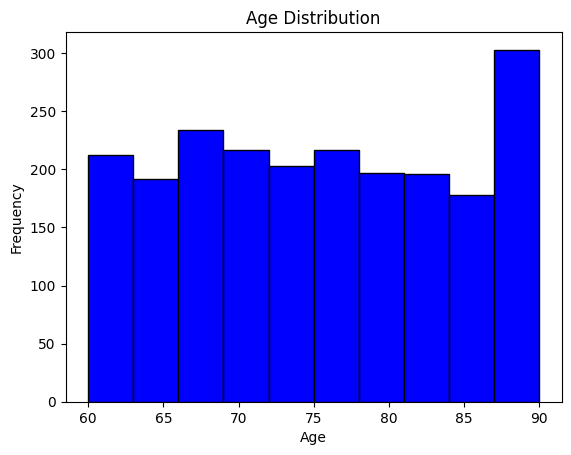

In [ ]:
plt.hist(df["Age"], bins=10, color="blue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()


#Data Preprocessing

One hot encoding

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Ethnicity'], drop_first=False).astype(int)
df_encoded.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,73,0,2,22,0,13,6,1,9,0,...,0,0,0,1,0,0,1,0,0,0
1,89,0,0,26,0,4,7,0,7,0,...,0,0,0,0,1,0,1,0,0,0
2,73,0,1,17,0,19,7,1,9,1,...,0,1,0,1,0,0,0,0,0,1
3,74,1,1,33,1,12,8,7,8,0,...,0,0,0,0,0,0,1,0,0,0
4,89,0,0,20,0,18,6,0,5,0,...,0,0,1,1,0,0,1,0,0,0


In [ ]:
df_encoded.columns

Index(['Age', 'Gender', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'Ethnicity_0', 'Ethnicity_1',
       'Ethnicity_2', 'Ethnicity_3'],
      dtype='object')

Split Data into training and testing

In [ ]:
X=df_encoded.drop('Diagnosis', axis=1)
y=df_encoded['Diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



Standardize

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Model training

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','recall'])


model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5761 - loss: 0.8777 - recall: 0.3550 - val_accuracy: 0.5977 - val_loss: 0.6534 - val_recall: 0.1925
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6027 - loss: 0.7696 - recall: 0.3386 - val_accuracy: 0.6837 - val_loss: 0.6071 - val_recall: 0.3851
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6469 - loss: 0.6631 - recall: 0.4084 - val_accuracy: 0.7372 - val_loss: 0.5719 - val_recall: 0.5031
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6816 - loss: 0.6235 - recall: 0.4463 - val_accuracy: 0.7605 - val_loss: 0.5432 - val_recall: 0.5839
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6739 - loss: 0.5999 - recall: 0.4328 - val_accuracy: 0.7814 - val_loss: 0.5230 - val_recall: 0.6149
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7327 - loss: 0.5374 - recall: 0.5506 - val_accuracy: 0.7860 - val_loss: 0.5091 - val_recall: 0.6770
Epoch 7/50
54/5

#Plotting

Plot the loss, accuracy and recall over

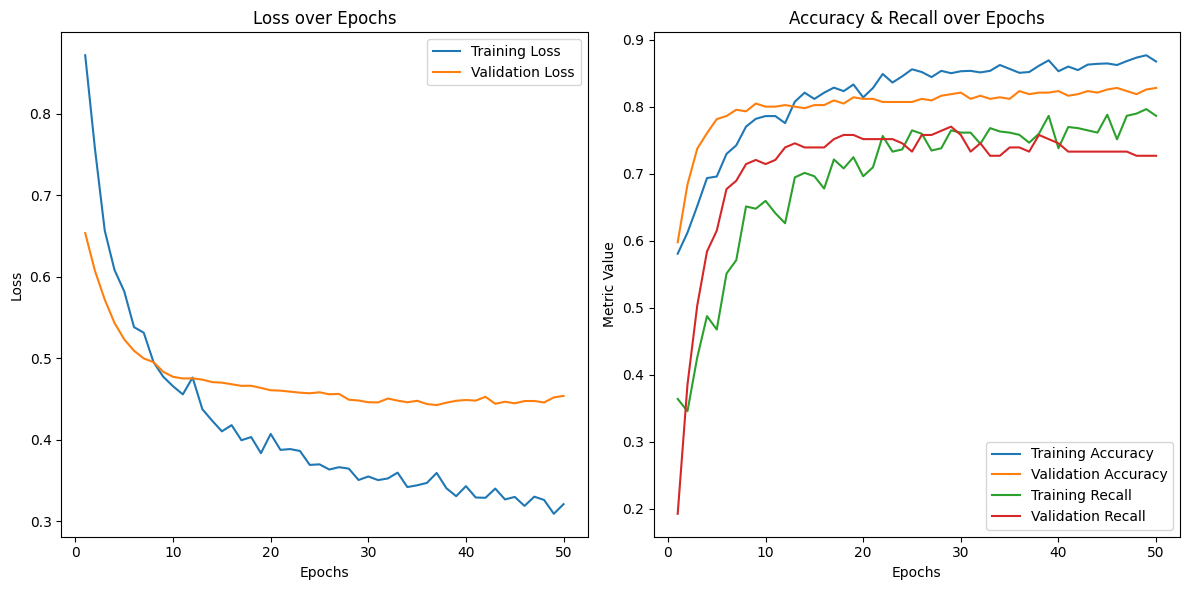

In [ ]:
def plot_metrics(history):
    epoch_range = range(1, len(history.history['loss']) + 1)
    plt.figure(figsize=(12, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, history.history['loss'], label='Training Loss')
    plt.plot(epoch_range, history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    # Plot Accuracy and Recall
    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epoch_range, history.history['val_accuracy'], label='Validation Accuracy')

    # Plot Recall
    plt.plot(epoch_range, history.history['recall'], label='Training Recall')
    plt.plot(epoch_range, history.history['val_recall'], label='Validation Recall')

    plt.xlabel('Epochs')
    plt.ylabel('Metric Value')
    plt.title('Accuracy & Recall over Epochs')
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_metrics(history)


#Experiment with L1 L2 elastic regulaization

In [ ]:
#L1 Regularization
model_l1 = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l1(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])



# L2 Regularization
model_l2 = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Elastic Net (L1 + L2 Regularization)
model_elastic_net = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])



model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'recall'])
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'recall'])
model_elastic_net.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'recall'])

history_l1 = model_l1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
history_l2 = model_l2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
history_elastic_net = model_elastic_net.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4878 - loss: 3.8115 - recall: 0.4004 - val_accuracy: 0.6349 - val_loss: 3.1841 - val_recall: 0.3106
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5739 - loss: 3.2634 - recall: 0.4048 - val_accuracy: 0.7116 - val_loss: 2.8297 - val_recall: 0.3540
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6454 - loss: 2.8531 - recall: 0.4589 - val_accuracy: 0.7628 - val_loss: 2.4992 - val_recall: 0.4907
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6879 - loss: 2.4976 - recall: 0.5073 - val_accuracy: 0.7907 - val_loss: 2.1981 - val_recall: 0.5963
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7074 - loss: 2.1559 - recall: 0.4946 - val_accuracy: 0.8140 - val_loss: 1.9098 - val_recall: 0.6460
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7183 - loss: 1.8874 - recall: 0.5466 - val_accuracy: 0.8116 - val_loss: 1.6581 - val_recall: 0.6460
Epoch 7/50
54/5

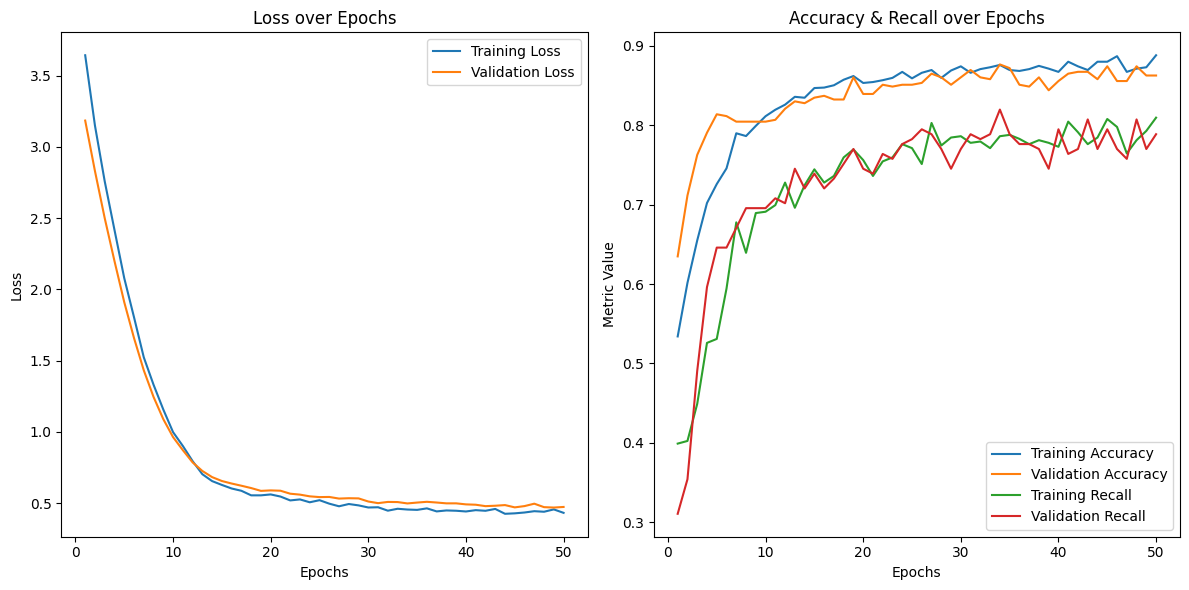

In [ ]:
plot_metrics(history_l1)

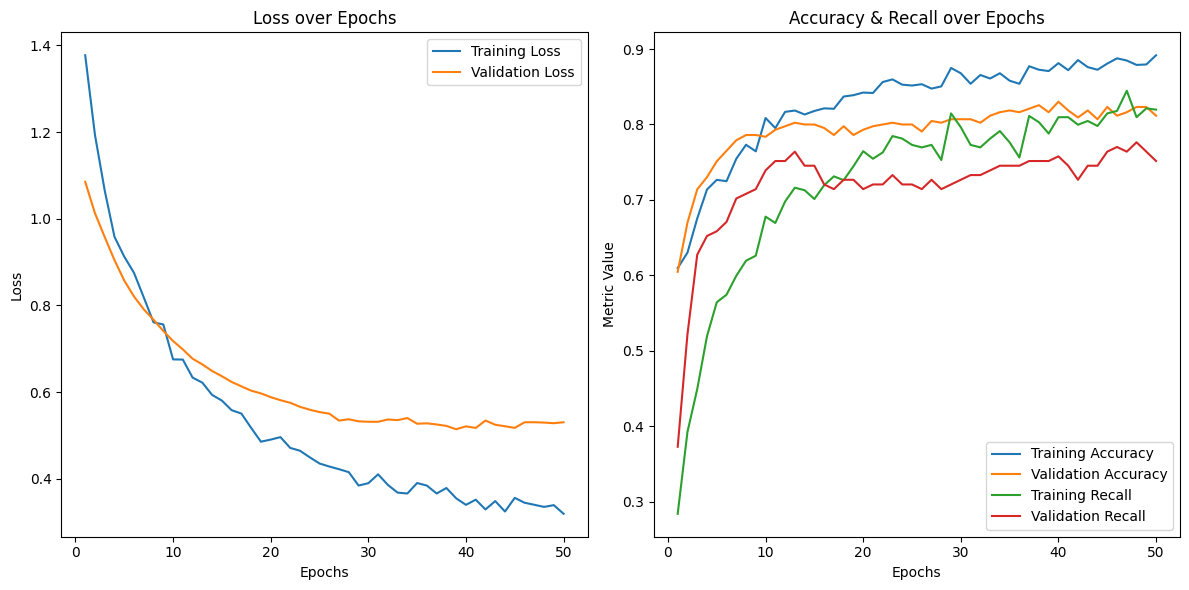

In [ ]:
plot_metrics(history_l2)

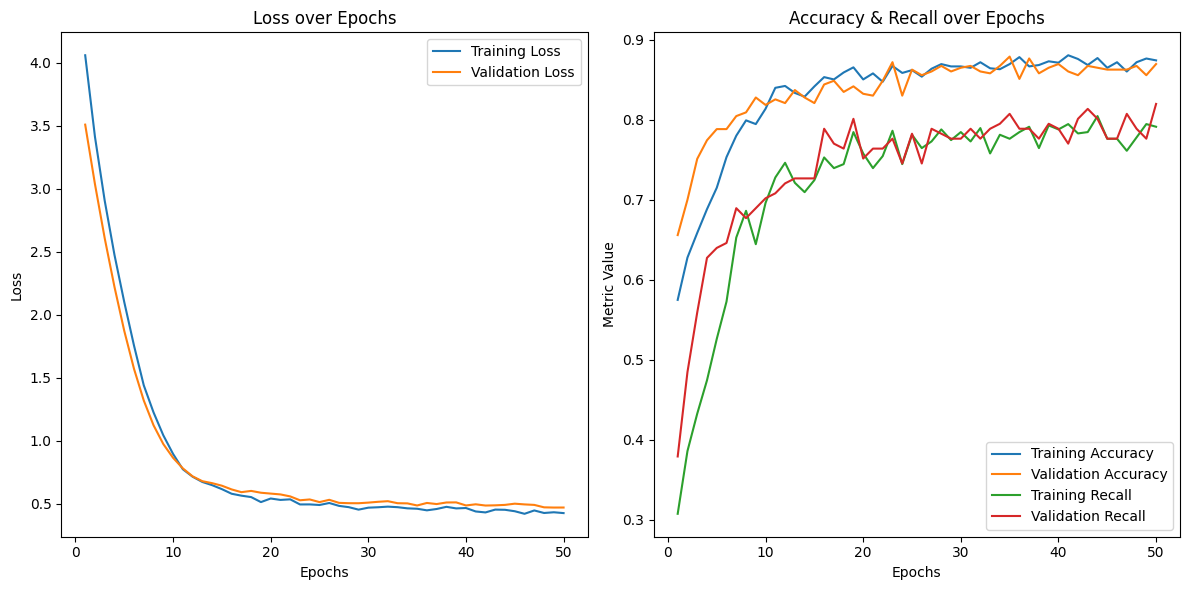

In [ ]:
plot_metrics(history_elastic_net)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.4999 - loss: 4.0180 - recall: 0.5950 - val_accuracy: 0.7512 - val_loss: 3.2576 - val_recall: 0.6056
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6707 - loss: 3.1311 - recall: 0.5242 - val_accuracy: 0.7953 - val_loss: 2.5988 - val_recall: 0.5352
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7589 - loss: 2.4640 - recall: 0.5793 - val_accuracy: 0.8279 - val_loss: 2.0536 - val_recall: 0.5704
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7945 - loss: 1.9550 - recall: 0.6705 - val_accuracy: 0.8349 - val_loss: 1.6215 - val_recall: 0.5634
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7884 - loss: 1.5873 - recall: 0.6764 - val_accuracy: 0.8512 - val_loss: 1.2846 - val_recall: 0.6268
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8349 - loss: 1.2123 - recall: 0.7195 - val_accuracy: 0.8605 - val_loss: 1.0358 - val_recall: 0.6549
Epoch 7/50
54/54 ━━━━━━━

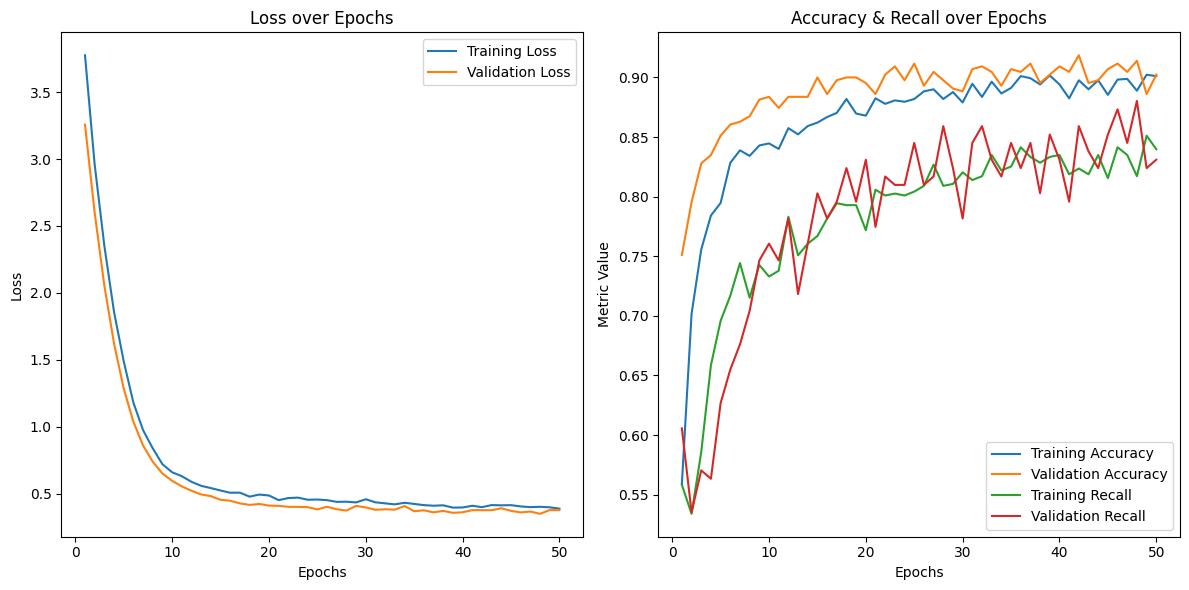

In [ ]:
# Elastic Net (L1 + L2 Regularization)
model_elastic_net = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])
model_elastic_net.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'recall'])
history_elastic_net = model_elastic_net.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
plot_metrics(history_elastic_net)

#Confusion Matrix

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


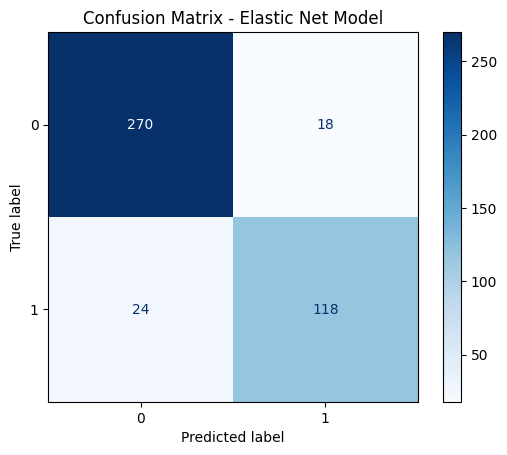

In [ ]:
y_pred = model_elastic_net.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

plt.title("Confusion Matrix - Elastic Net Model")
plt.show()

In [ ]:
model_elastic_net.save("alzheimer_model.keras")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']